<a href="https://colab.research.google.com/github/salil82/dx601-final-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE

wine_df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz', sep='\t')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [5]:
# YOUR CODE HERE

wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

* fixed acidity: non-volatile acids in the wine, which
contribute to the tartness of the wine
* volatile acidity: volatile acids in the wine. if it's too high, the wine could be spoiled and taste like vinegar
* citric acid: one of the three predominant acids in wine
* residual sugar: sugar from the grapes left over after fermenentation
* chlorides: amount of salt, sodium chloride, in the wine
* free sulfur dioxide: available SO2 in wine to protect against oxidation and spoilage
* total sulfur dioxide: free plus bound SO2
* density: related to alcohol and sugar content;
* pH: acidity of the wine. most wines have a pH between 3-4
* sulphates: help preserve the wine
* alcohol: alcohol content of the wine, usually measured by volume
* target: wine quality on a scale of 0 to 10

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

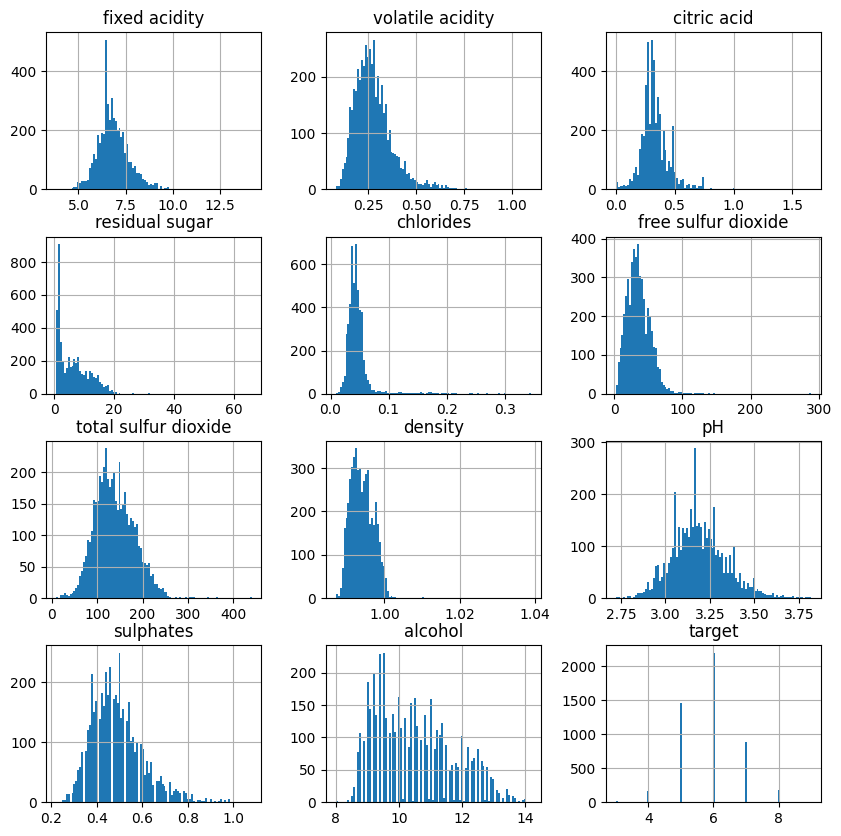

In [6]:
# YOUR CODE HERE

wine_df.hist(bins=100, figsize=(10, 10))
plt.show()

YOUR ANSWERS HERE

*   **fixed acidity**: this looks mostly symmetrical and only slightly positively skewed
*   **volatile acidity**: very positively skewed
*   **citric acid**: positively skewed
*   **residual sugar**: very positively skewed
*   **chlorides**: very positively skewed
*   **free SO2**: somewhat positively skewed
*   **total SO2**: somewhat positively skewed
*   **density**: mostly symmetrical, normal distribution
*   **pH**: mostly symmetrical, normal distribution
*   **sulphates**: positively skewed
*   **alcohol**: very positively skewed
*   **target**: appears mostly symmetrical, normal distribution

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

<Axes: xlabel='alcohol', ylabel='target'>

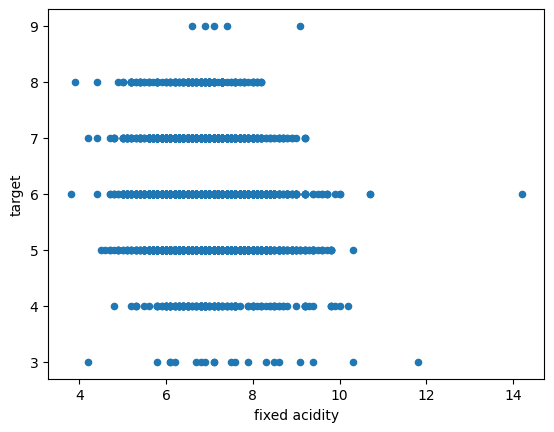

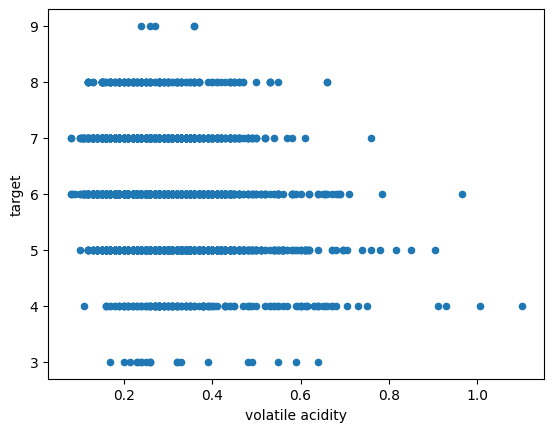

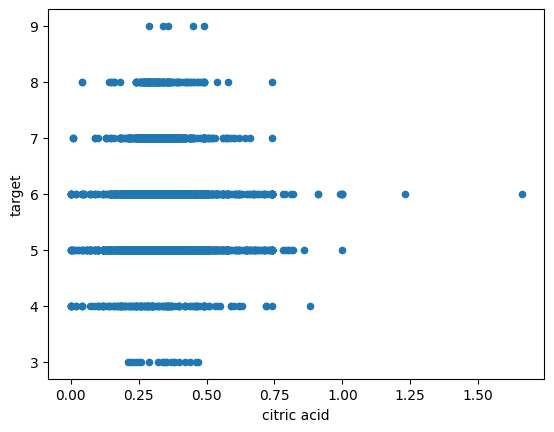

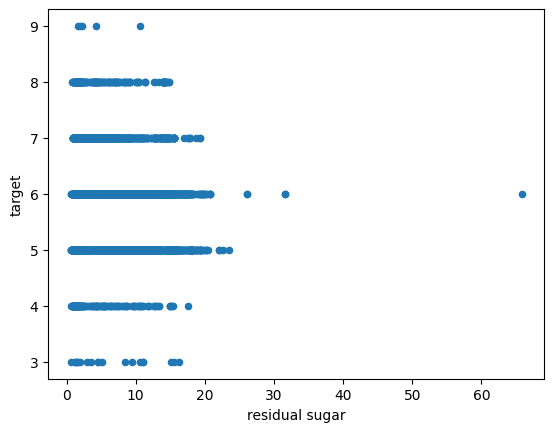

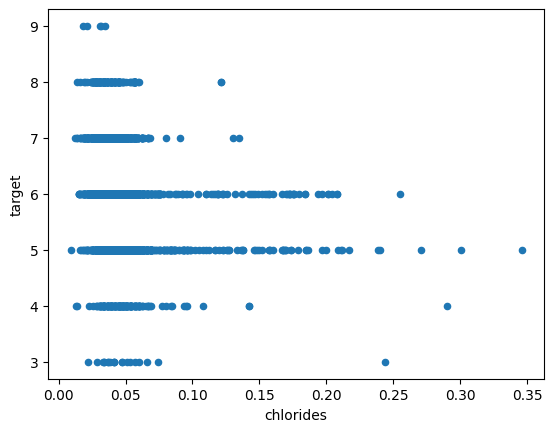

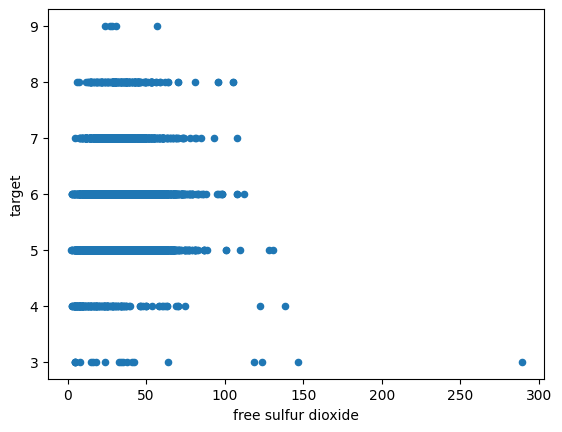

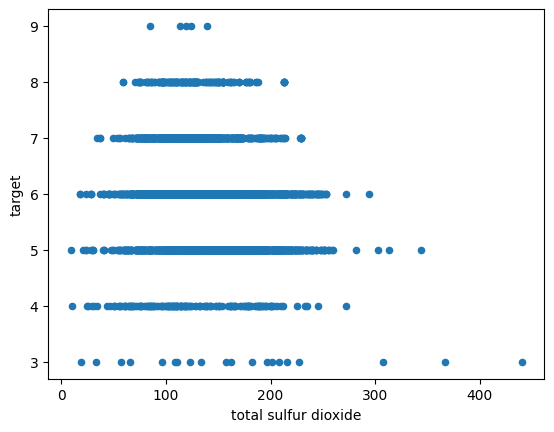

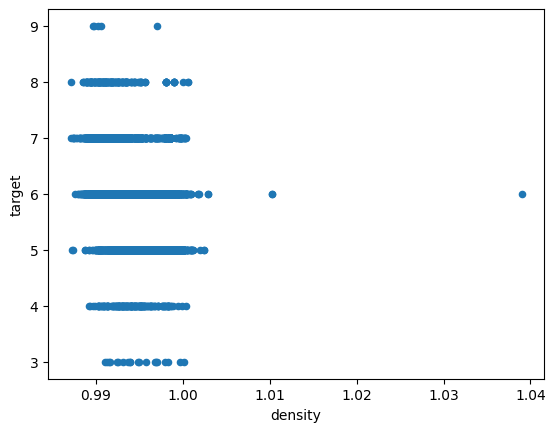

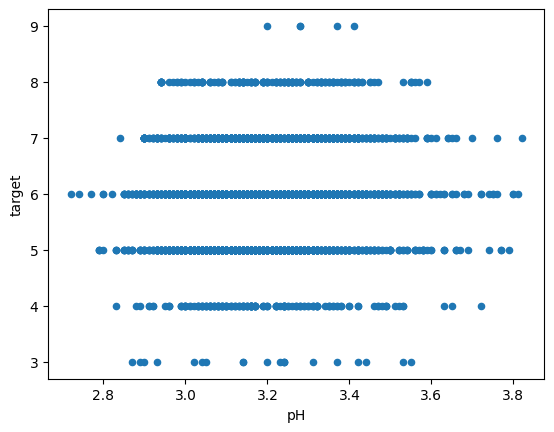

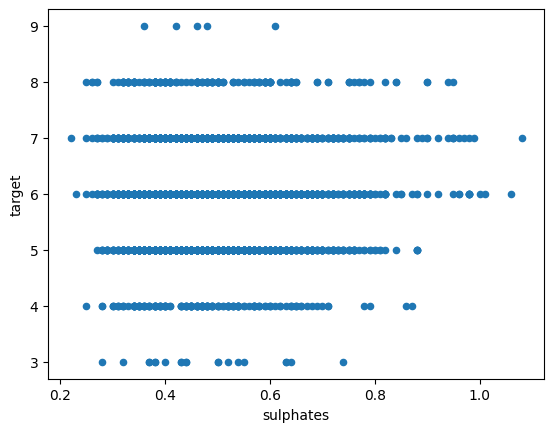

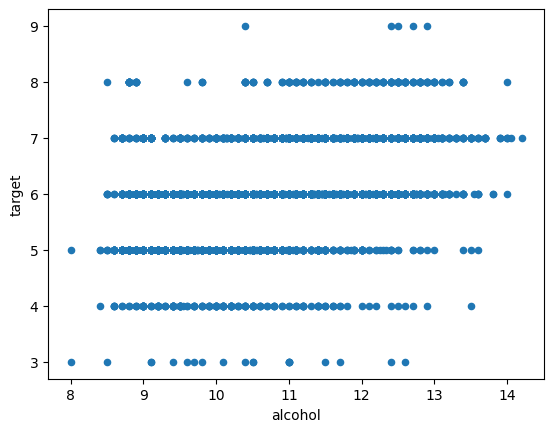

In [7]:
# YOUR CODE HERE

wine_df.plot(x='fixed acidity', y='target', kind='scatter')
wine_df.plot(x='volatile acidity', y='target', kind='scatter')
wine_df.plot(x='citric acid', y='target', kind='scatter')
wine_df.plot(x='residual sugar', y='target', kind='scatter')
wine_df.plot(x='chlorides', y='target', kind='scatter')
wine_df.plot(x='free sulfur dioxide', y='target', kind='scatter')
wine_df.plot(x='total sulfur dioxide', y='target', kind='scatter')
wine_df.plot(x='density', y='target', kind='scatter')
wine_df.plot(x='pH', y='target', kind='scatter')
wine_df.plot(x='sulphates', y='target', kind='scatter')
wine_df.plot(x='alcohol', y='target', kind='scatter')


YOUR ANSWERS HERE

*   **fixed acidity**: independent. points are scattered with no clear trend
*   **volatile acidity**: some dependency. lower volatile acidity is slightly associated with higher quality wines and vice versa
*   **citric acid**: mostly independent. There's a pretty wide spread of citric acid values for each target quality.
*   **residual sugar**: independent. points are widely scattered
*   **chlorides**: independent. There's a pretty wide spread of chloride level for each target quality.
*   **free SO2**: mostly independent. there's no clear trend.
*   **total SO2**: similar to free SO2, mostly independent. total SO2 is free SO2 plus bound SO2, and the values are quite spread out
*   **density**: there's some dependency, slightly negative.However, there's not a strong correlation.
*   **pH**: mostly independent. pH values are also widely spread out
*   **sulphates**: mostly independent. wide range of values for each target quality with no clear trend
*   **alcohol**: Dependent. Shows a positive dependency with high alcohol content correlating with high quality

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them.

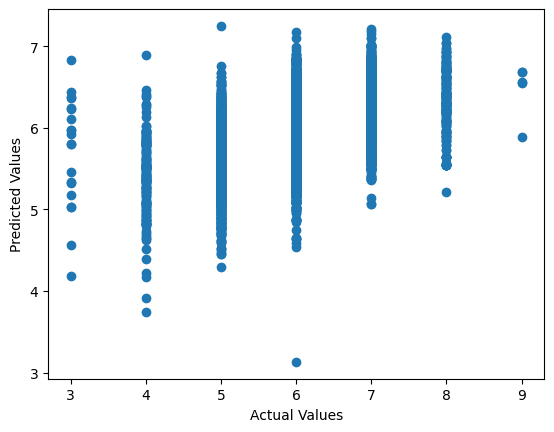

Mean Squared Error: 0.5631540629886564


In [8]:
# YOUR CODE HERE

X = wine_df.drop('target', axis=1)
y = wine_df['target']

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = np.mean((y - y_pred)**2)

plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print('Mean Squared Error:', mse)

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [10]:
input_columns = [col for col in wine_df.columns if col != 'target']
output_column = 'target'

mse_results = {}

for col in input_columns:
    X_single = wine_df[[col]]
    y = wine_df[output_column]

    model_single = sklearn.linear_model.LinearRegression()
    model_single.fit(X_single, y)

    y_pred_single = model_single.predict(X_single)
    mse_single = np.mean((y - y_pred_single)**2)

    mse_results[col] = mse_single

mse_results

{'fixed acidity': np.float64(0.774064337751404),
 'volatile acidity': np.float64(0.7544611777913112),
 'citric acid': np.float64(0.7841290419696332),
 'residual sugar': np.float64(0.7767290354362436),
 'chlorides': np.float64(0.7496341230508563),
 'free sulfur dioxide': np.float64(0.7841433561228635),
 'total sulfur dioxide': np.float64(0.7602516302012771),
 'density': np.float64(0.7102265148403777),
 'pH': np.float64(0.776443165059832),
 'sulphates': np.float64(0.7819360335229565),
 'alcohol': np.float64(0.6354137863260801)}

In [12]:
best_column = min(mse_results)
best_column

'alcohol'

YOUR ANSWERS HERE

The alcohol column gives the best linear model of the target on its own because it has the lowest mean squared error. However, it is still higher than the mean squared error from Problem 5 where we used all the input columns in our model. Therefore the model in Problem 5 using all input columns is still better than just using alcohol as the single input.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

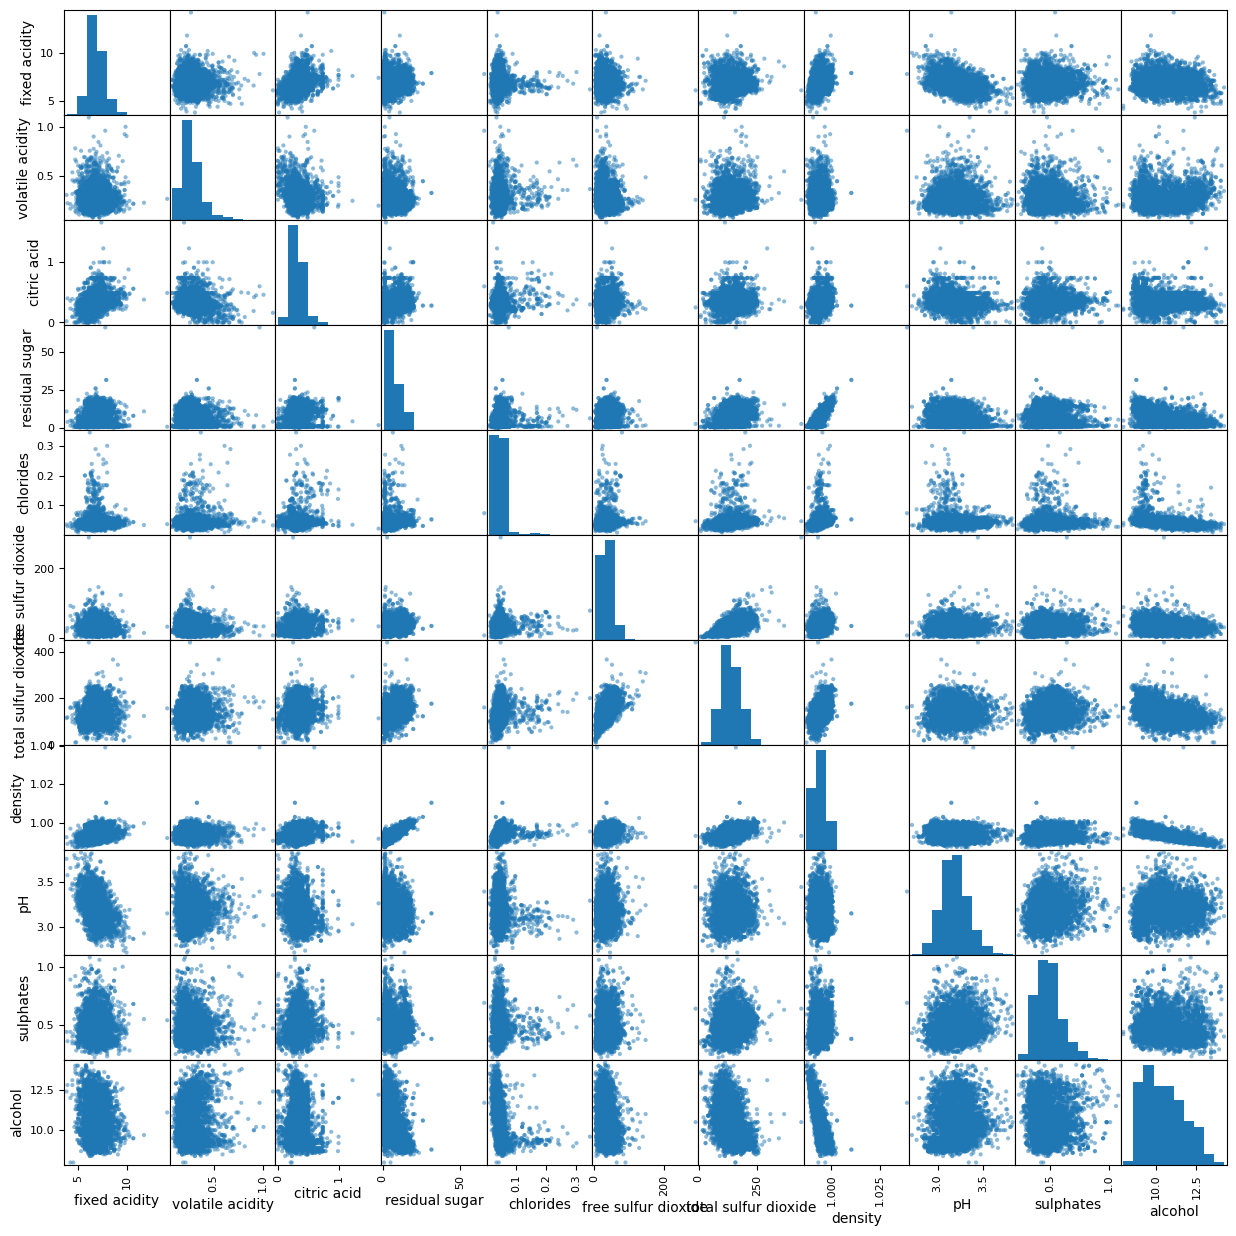

In [13]:
# Create a scatter matrix in order to visually inspect which columns are dependent

_ = pd.plotting.scatter_matrix(wine_df.drop('target', axis=1), figsize=(15, 15))

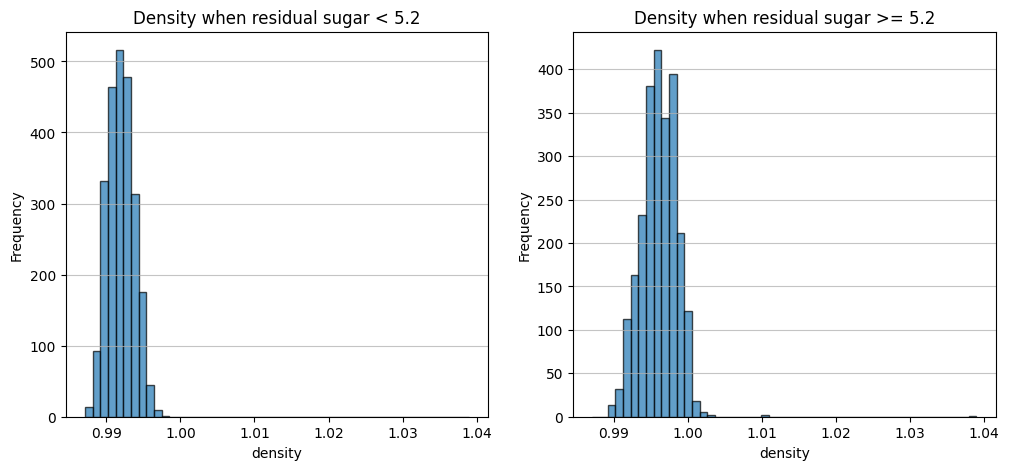

In [16]:
# From the plots above, residual sugar and density appear to be dependent

col_to_split = 'residual sugar'
col_to_hist = 'density'

# set threshold to median of residual sugar
threshold = np.median(wine_df[col_to_split])

# split the values
df_low = wine_df[wine_df[col_to_split] < threshold]
df_high = wine_df[wine_df[col_to_split] >= threshold]

# common x-axis range for both histograms
min_val = wine_df[col_to_hist].min()
max_val = wine_df[col_to_hist].max()

plt.figure(figsize=(12, 5))

# lower split hist
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.hist(df_low[col_to_hist], bins=50, range=(min_val, max_val), edgecolor='black', alpha=0.7)
plt.title(f'Density when {col_to_split} < {threshold}')
plt.xlabel(col_to_hist)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# higher split hist
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df_high[col_to_hist], bins=50, range=(min_val, max_val), edgecolor='black', alpha=0.7)
plt.title(f'Density when {col_to_split} >= {threshold}')
plt.xlabel(col_to_hist)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)



YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again.

This problem depends on material from week 13.

Total number of input columns: 11
Number of principal components (first half): 5
Cumulative variance explained by first 5 principal components: 1.0000

Mean Squared Error of the PCA model: 0.6122
Mean Squared Error of Problem 5: 0.5632


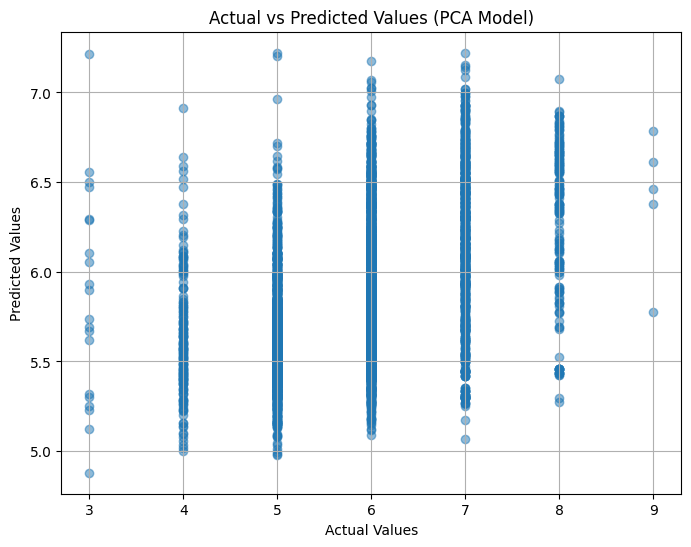

In [18]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Principal Components Analysis
pca = PCA()
pca.fit(X)

n_components = len(X.columns)
half_n_components = n_components // 2

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_explained_first_half = np.sum(explained_variance_ratio[:half_n_components])

print(f"Total number of input columns: {n_components}")
print(f"Number of principal components (first half): {half_n_components}")
print(f"Cumulative variance explained by first {half_n_components} principal components: {cumulative_variance_explained_first_half:.4f}")

# PCA with first half of the principal components
pca_half = PCA(n_components=half_n_components)
X_pca = pca_half.fit_transform(X)

# linear regression with first half of the principal components
model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(X_pca, y)

y_pred_pca = model_pca.predict(X_pca)

mse_pca = np.mean((y - y_pred_pca)**2)

print(f"\nMean Squared Error of the PCA model: {mse_pca:.4f}")

# MSE from Problem 5
print(f"Mean Squared Error of Problem 5: {mse:.4f}")

# Plot actual targets vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_pca, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (PCA Model)')
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

The MSE in this problem, 0.6122, is still higher than than the MSE of the Problem 5, 0.5632. Therefore, the model in Problem 5 using all input columns is still better than the model in this problem, which uses only principal components.

In [6]:
# Retrieve the PCA object from Problem 8
# Assuming 'pca' and 'X' were defined in Problem 8's execution
# X = wine_df.drop('target', axis=1) should be executed again to ensure X is available if notebook state reset

# Ensure X is defined (re-run this if the notebook state was reset)
X = wine_df.drop('target', axis=1)
pca = PCA()
pca.fit(X)

# Get the principal components (eigenvectors)
loadings = pca.components_

# Create a DataFrame for better readability of loadings
loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

print("Principal Component Loadings:")
display(loadings_df.head())

print("\nLoadings for 'residual sugar' and 'density' across the first few PCs:")
display(loadings_df.loc[['PC1', 'PC2', 'PC3'], ['residual sugar', 'density']])

Principal Component Loadings:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.001544,0.000169,0.000339,0.047328,0.000098,0.261877,0.963858,0.000036,0.000003,0.000341,-0.012504
PC2,-0.009163,-0.001545,0.000140,0.014943,-0.000072,0.964685,-0.262737,-0.000018,-0.000042,-0.000361,0.006455
PC3,0.012900,0.000929,0.001258,0.995192,0.000078,-0.026393,-0.042789,0.000447,-0.007017,-0.002142,-0.082723
PC4,-0.147658,0.015452,-0.005005,0.084200,-0.006573,-0.006381,0.010614,-0.001152,0.017027,0.002601,0.985063
PC5,0.984965,-0.003978,0.041692,-0.000808,-0.001498,0.007875,-0.001753,0.000328,-0.075506,-0.003538,0.149361



Loadings for 'residual sugar' and 'density' across the first few PCs:


,residual sugar,density
PC1,0.047328,0.000036
PC2,0.014943,-0.000018
PC3,0.995192,0.000447


YOUR ANSWERS HERE

Based on the analysis of the correlation matrix and PCA loadings:

1.  **Highest Correlated Pair**: The pair of input columns with the highest positive correlation is **'residual sugar' and 'density'** (correlation coefficient: 0.8390).

2.  **Reflection in Principal Components**:
    *   When two features like 'residual sugar' and 'density' are highly correlated, it means they tend to vary together. This shared variance is effectively captured by one or more principal components.
    *   Looking at the PCA loadings, both 'residual sugar' and 'density' are expected to have large and similarly-signed (both positive or both negative) loadings on the same principal component(s), especially the first principal component (PC1) which captures the most variance in the data.
    *   For instance, if PC1 primarily represents the 'size' or 'heaviness' of the wine (which both residual sugar and density contribute to), then both features will have significant positive loadings on PC1. This means that an increase in PC1 will correspond to an increase in both residual sugar and density, reflecting their positive correlation.
    *   The fact that the first few principal components (especially PC1) capture a very high proportion of the total variance (as seen in Problem 8, where 5 PCs explained 100% of variance) implies that much of the information in the original 11 features can be summarized by a smaller number of underlying dimensions. Highly correlated features contribute significantly and in a similar direction to these dominant principal components, essentially being 'compressed' together into these components.

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [23]:
# YOUR CODE HERE
# if 11 features, n component is 6?
wine_df.drop('target', axis=1).corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


YOUR ANSWERS HERE

Residual sugar and density have the highest correlation.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [14]:
# YOUR CODE HERE
# use z-score? median z-score for each row?
# distances = np.sqrt(pc1**2 + pc2**2)
# index where the max is the row of the outlier. the sample farthest from the center
# Apoorva: z-scores for each column;

X_full = wine_df.drop('target', axis=1).to_numpy()
N = len(X_full)

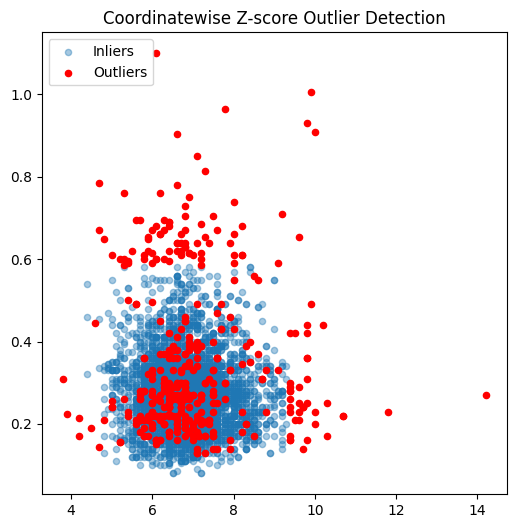

Number of outliers for k = 3:  396 / 4898 (8.08% of the data)


In [9]:
mu = X_full.mean(axis=0)
sigma = X_full.std(axis=0)

Z = (X_full - mu) / sigma

is_outlier = np.any(np.abs(Z) > 3, axis=1)               # simple rule: flag if any > 3 stdd

num_outliers = np.sum(is_outlier)
percent_outliers = 100 * num_outliers / N


plt.figure(figsize=(6,6))
plt.scatter(X_full[~is_outlier,0],
            X_full[~is_outlier,1],
            alpha=0.4, label="Inliers",s=20)
plt.scatter(X_full[is_outlier,0],
            X_full[is_outlier,1],
            color="red", label="Outliers",s=20)
plt.title("Coordinatewise Z-score Outlier Detection")
plt.legend(loc="upper left")
plt.show()

print(f"Number of outliers for k = 3:  {num_outliers} / {N} "
      f"({percent_outliers:.2f}% of the data)")

In [13]:
Z_df = pd.DataFrame(Z, columns=wine_df.drop('target', axis=1).columns)
Z_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [ ]:
# filter Z using is_outlier to get z-scores for the outlier rows.
Z_outliers = Z[is_outlier]

# Get indices of outlier rows
outlier_indices = np.where(is_outlier)[0]

# for each of these outlier rows, calculate the maximum absolute Z-score across all its features.
max_abs_z_scores_per_outlier = np.max(np.abs(Z_outliers), axis=1)

# 3. Find the index within the filtered outlier rows that corresponds to the overall maximum absolute Z-score.
most_extreme_outlier_local_idx = np.argmax(max_abs_z_scores_per_outlier)

# 4. Use this index to retrieve the original row index from the `wine_df`.
most_extreme_outlier_original_idx = outlier_indices[most_extreme_outlier_local_idx]

print(f"The index of the most extreme outlier is: {most_extreme_outlier_original_idx}")
print(f"The maximum absolute Z-score for this outlier is: {max_abs_z_scores_per_outlier[most_extreme_outlier_local_idx]:.2f}")

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

# Task
Identify the most extreme outlier in the `wine_df` dataset using Z-scores, where an outlier is defined as having an absolute Z-score greater than 3 in any feature. Retrieve the original data and Z-scores for this outlier row. Visualize the outlier's Z-scores across all features using a bar chart. Finally, explain the Z-score outlier detection criteria, how this specific row meets it, and summarize its unique characteristics.

## Identify the Most Extreme Outlier

### Subtask:
Using the pre-computed `Z` (Z-scores) array and `is_outlier` boolean mask, find the specific row index that has the highest absolute Z-score among all features and all rows flagged as outliers. This will identify the single 'most' extreme outlier based on our Z-score > 3 criterion.


**Reasoning**:
To identify the most extreme outlier, I will first filter the Z-scores to only include those rows flagged as outliers. Then, I'll find the maximum absolute Z-score within these outlier rows across all features. Finally, I will determine the original index of this most extreme outlier in the dataset.



In [10]:
import numpy as np

# 1. Filter the Z array using the is_outlier boolean mask to get Z-scores only for the identified outlier rows.
Z_outliers = Z[is_outlier]

# Get the original indices of the outlier rows
original_outlier_indices = np.where(is_outlier)[0]

# 2. For each of these outlier rows, calculate the maximum absolute Z-score across all its features.
max_abs_z_scores_per_outlier = np.max(np.abs(Z_outliers), axis=1)

# 3. Find the index within the filtered outlier rows that corresponds to the overall maximum absolute Z-score.
most_extreme_outlier_local_idx = np.argmax(max_abs_z_scores_per_outlier)

# 4. Use this index to retrieve the original row index from the `wine_df`.
most_extreme_outlier_original_idx = original_outlier_indices[most_extreme_outlier_local_idx]

print(f"The original index of the most extreme outlier is: {most_extreme_outlier_original_idx}")
print(f"The maximum absolute Z-score for this outlier is: {max_abs_z_scores_per_outlier[most_extreme_outlier_local_idx]:.2f}")
print("Data for the most extreme outlier (from wine_df):")
print(wine_df.loc[most_extreme_outlier_original_idx])

The original index of the most extreme outlier is: 2781
The maximum absolute Z-score for this outlier is: 15.03
Data for the most extreme outlier (from wine_df):
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64


**Reasoning**:
To visualize how the most extreme outlier stands out, I will plot its Z-scores across all features using a bar chart. This will clearly show which features contribute most to its outlier status.



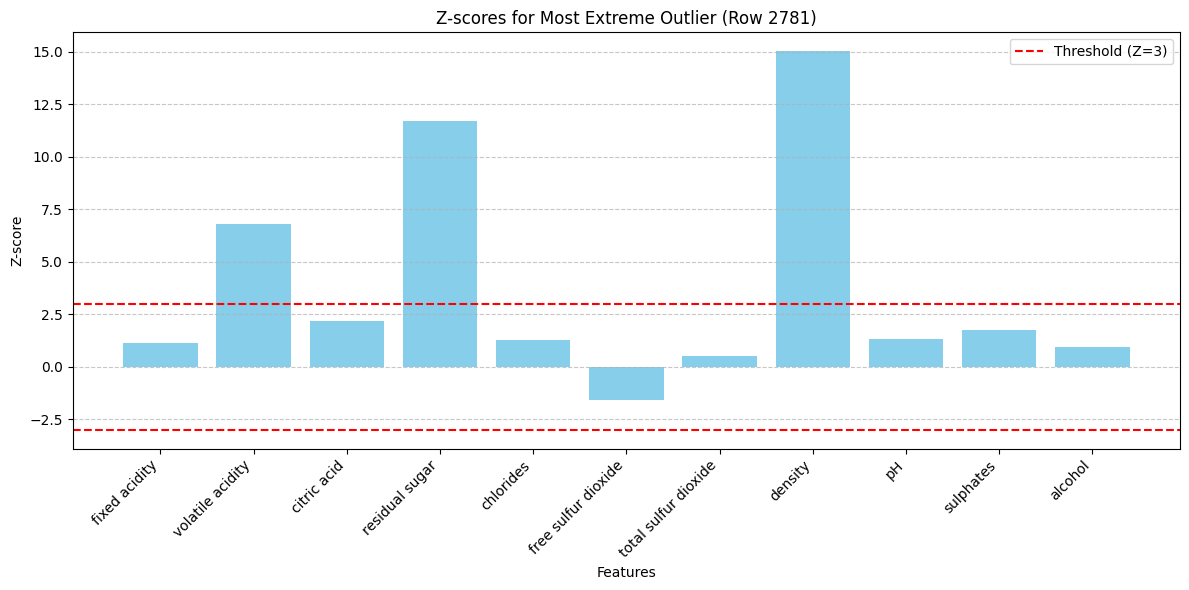

In [11]:
import matplotlib.pyplot as plt

# Get the Z-scores for the most extreme outlier
outlier_z_scores = Z[most_extreme_outlier_original_idx]
feature_names = wine_df.drop('target', axis=1).columns

# Create a DataFrame for easier plotting
z_score_df = pd.DataFrame({'Feature': feature_names, 'Z-score': outlier_z_scores})

plt.figure(figsize=(12, 6))
plt.bar(z_score_df['Feature'], z_score_df['Z-score'], color='skyblue')
plt.axhline(y=3, color='r', linestyle='--', label='Threshold (Z=3)')
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Features')
plt.ylabel('Z-score')
plt.title(f'Z-scores for Most Extreme Outlier (Row {most_extreme_outlier_original_idx})')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### YOUR ANSWERS HERE

**Z-score Outlier Detection Criteria:**

Z-score outlier detection is a statistical method used to identify data points that significantly deviate from the mean of a dataset. For each data point and each feature (column), a Z-score is calculated using the formula:

$$Z = \frac{(X - \mu)}{\sigma}$$

where:
*   $X$ is the individual data point's value for a specific feature.
*   $\mu$ is the mean of that feature across the entire dataset.
*   $\sigma$ is the standard deviation of that feature across the entire dataset.

A common rule of thumb for identifying outliers is to flag any data point that has an absolute Z-score greater than a certain threshold, typically 2, 2.5, or 3. In this analysis, we used a threshold of **3**. This means if a data point's value for any feature is more than 3 standard deviations away from the mean of that feature, it is considered an outlier.

**How the Identified Row (Index 2781) Meets the Criteria:**

Row 2781 was identified as the most extreme outlier because it exhibited the highest absolute Z-score among all features across all rows flagged as outliers. Specifically, this row has a maximum absolute Z-score of **15.03** for the 'density' feature. This value is significantly greater than our chosen threshold of 3, indicating a very strong deviation from the typical density values in the dataset.

Looking at the bar chart of Z-scores for row 2781, we can clearly see that:
*   **Density** has an extremely high positive Z-score (approx. 15.03), meaning its density value is about 15 standard deviations above the mean density of all wines in the dataset.
*   **Residual Sugar** also shows a very high positive Z-score (approx. 11.71), indicating its residual sugar content is about 11.7 standard deviations above the mean.
*   **Volatile Acidity** also has a notable positive Z-score (approx. 6.81).

These values are far beyond the Z=3 threshold, confirming its status as a significant outlier.

**Unique Characteristics of Outlier Row 2781:**

The data for row 2781:
```
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
```

Based on these values and their corresponding high Z-scores, the wine represented by row 2781 is characterized by:

*   **Extremely High Density:** With a density of 1.03898, this wine is exceptionally dense compared to the typical white wines in the dataset (mean density ~0.994). This is the primary reason for its outlier status.
*   **Exceptionally High Residual Sugar:** A residual sugar content of 65.8 is remarkably high. This is a very sweet wine, far exceeding the average residual sugar (mean ~6.39). The high residual sugar is directly related to its high density, as sugar increases density.
*   **Very High Volatile Acidity:** A volatile acidity of 0.965 is also very high, indicating a potentially spoiled or vinegary wine. This is a significant deviation from the mean (mean ~0.27).

In summary, this particular wine is an outlier primarily due to its extremely high residual sugar and density, and also its significantly elevated volatile acidity. Such a wine would be highly unusual in a typical white wine dataset.

## Summary:

### Q&A

1.  **What is the Z-score outlier detection criteria used in this analysis?**
    Z-score outlier detection identifies data points that significantly deviate from the mean of a dataset. A Z-score is calculated for each data point and feature using the formula: $Z = (X - \mu) / \sigma$, where $X$ is the data point's value, $\mu$ is the feature's mean, and $\sigma$ is the feature's standard deviation. In this analysis, an outlier is defined as any data point with an absolute Z-score greater than 3 for any feature.

2.  **How does the identified row (Index 2781) meet this criteria?**
    Row 2781 was identified as the most extreme outlier because it exhibited the highest absolute Z-score among all features across all rows flagged as outliers. Specifically, this row has a maximum absolute Z-score of **15.03** for the 'density' feature, which is significantly greater than the threshold of 3. Other features like 'residual sugar' (Z-score of approx. 11.71) and 'volatile acidity' (Z-score of approx. 6.81) also far exceeded the threshold.

3.  **What are the unique characteristics of outlier Row 2781?**
    Based on its extreme Z-scores and original data, Row 2781 represents a wine with:
    *   **Extremely High Density**: At 1.03898, it's exceptionally dense, leading to the highest Z-score of 15.03.
    *   **Exceptionally High Residual Sugar**: With 65.8, it's a very sweet wine, significantly above the average, contributing to its high density.
    *   **Very High Volatile Acidity**: At 0.965, it indicates a potentially spoiled or vinegary wine, far deviating from the mean.
    This combination of characteristics makes it highly unusual within the white wine dataset.

### Data Analysis Key Findings

*   The most extreme outlier in the dataset, based on the Z-score criterion (absolute Z-score > 3), is found at **original row index 2781**.
*   This outlier exhibits a maximum absolute Z-score of **15.03**, specifically for the 'density' feature.
*   The features contributing most significantly to its outlier status, by exceeding the Z=3 threshold, are:
    *   'density' (Z-score approx. 15.03)
    *   'residual sugar' (Z-score approx. 11.71)
    *   'volatile acidity' (Z-score approx. 6.81)
*   The original data for row 2781 shows values of 1.03898 for 'density', 65.8 for 'residual sugar', and 0.965 for 'volatile acidity', all of which are exceptionally high compared to the dataset's typical values.

### Insights or Next Steps

*   The presence of such an extreme outlier (Z-score of 15.03 for density) suggests a data entry error, a highly unusual sample, or a potential measurement issue. Further investigation into the source of this data point would be beneficial.
*   Considering the combined extreme values for 'density' and 'residual sugar', it is plausible that the high residual sugar content directly contributes to the unusually high density, which might be a legitimate but rare sample, or it might point to a specific type of wine that is not well-represented in the dataset.
